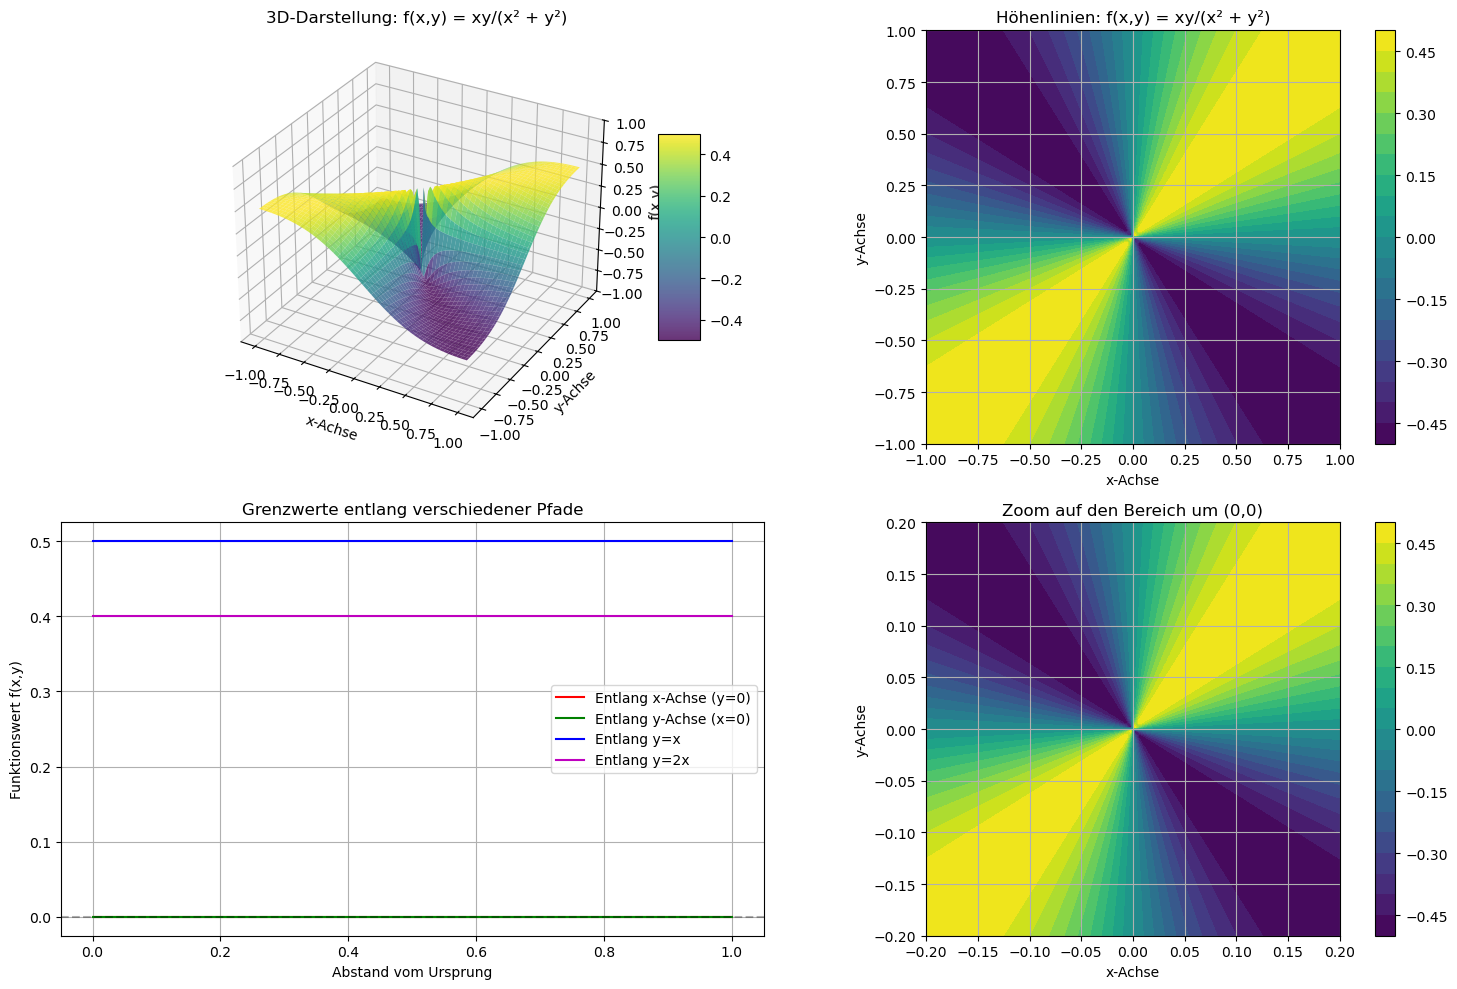

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Unterdrücke Warnungen zu Teilung durch Null
warnings.filterwarnings('ignore')

def f(x, y):
    """
    Die unstetige Funktion f(x,y) = xy/(x^2 + y^2) für (x,y) ≠ (0,0) und f(0,0) = 0
    """
    # Erstelle eine Kopie des Ergebnisses, um die ursprünglichen Arrays nicht zu verändern
    result = np.zeros_like(x, dtype=float)
    
    # Berechne die Funktion für alle Punkte außer (0,0)
    # Verwende eine Maske, um Punkte zu identifizieren, die nicht (0,0) sind
    mask = (x != 0) | (y != 0)
    result[mask] = (x[mask] * y[mask]) / (x[mask]**2 + y[mask]**2)
    
    # Der Wert an (0,0) ist definiert als 0
    # Da result bereits mit Nullen initialisiert wurde, müssen wir nichts mehr tun
    
    return result

# Gitterparameter
n = 100  # Anzahl der Punkte in jeder Dimension
x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0

# Erstelle das Gitter
x = np.linspace(x_min, x_max, n)
y = np.linspace(y_min, y_max, n)
X, Y = np.meshgrid(x, y)

# Berechne die Funktionswerte
Z = f(X, Y)

# Begrenze die Werte für eine bessere Visualisierung
# Die Funktion kann extreme Werte nahe der Singularität annehmen
Z = np.clip(Z, -1, 1)

# Erstelle die Plots
plt.figure(figsize=(15, 10))

# 1. 3D-Oberflächenplot
ax1 = plt.subplot(221, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none', alpha=0.8)
ax1.set_xlabel('x-Achse')
ax1.set_ylabel('y-Achse')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D-Darstellung: f(x,y) = xy/(x² + y²)')
ax1.set_zlim(-1, 1)
plt.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# 2. Höhenliniendiagramm (Contour-Plot)
ax2 = plt.subplot(222)
contour = ax2.contourf(X, Y, Z, 20, cmap=cm.viridis)
ax2.set_xlabel('x-Achse')
ax2.set_ylabel('y-Achse')
ax2.set_title('Höhenlinien: f(x,y) = xy/(x² + y²)')
plt.colorbar(contour, ax=ax2)
ax2.grid(True)
ax2.set_aspect('equal')

# 3. Grenzwertuntersuchung entlang verschiedener Pfade
plt.subplot(223)

# Pfad entlang der x-Achse (y=0)
t = np.linspace(0.001, 1, 100)  # Kleine Werte nahe Null, aber nicht Null selbst
x_path = t
y_path = np.zeros_like(t)
z_path = f(x_path, y_path)
plt.plot(t, z_path, 'r-', label='Entlang x-Achse (y=0)')

# Pfad entlang der y-Achse (x=0)
x_path = np.zeros_like(t)
y_path = t
z_path = f(x_path, y_path)
plt.plot(t, z_path, 'g-', label='Entlang y-Achse (x=0)')

# Pfad entlang der Diagonalen y=x
x_path = t
y_path = t
z_path = f(x_path, y_path)
plt.plot(t, z_path, 'b-', label='Entlang y=x')

# Pfad entlang y=2x
x_path = t
y_path = 2*t
z_path = f(x_path, y_path)
plt.plot(t, z_path, 'm-', label='Entlang y=2x')

plt.title('Grenzwerte entlang verschiedener Pfade')
plt.xlabel('Abstand vom Ursprung')
plt.ylabel('Funktionswert f(x,y)')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)

# 4. Zoom auf den Bereich um (0,0)
ax4 = plt.subplot(224)
x_zoom = np.linspace(-0.2, 0.2, n)
y_zoom = np.linspace(-0.2, 0.2, n)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)
Z_zoom = f(X_zoom, Y_zoom)
Z_zoom = np.clip(Z_zoom, -1, 1)

contour_zoom = ax4.contourf(X_zoom, Y_zoom, Z_zoom, 20, cmap=cm.viridis)
ax4.set_xlabel('x-Achse')
ax4.set_ylabel('y-Achse')
ax4.set_title('Zoom auf den Bereich um (0,0)')
plt.colorbar(contour_zoom, ax=ax4)
ax4.grid(True)
ax4.set_aspect('equal')

plt.tight_layout()
plt.savefig('unstetige_funktion.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
import numpy as np
import plotly.graph_objects as go

def f(x, y):
    """
    Die unstetige Funktion f(x,y) = xy/(x^2 + y^2) für (x,y) ≠ (0,0) und f(0,0) = 0
    """
    # Erstelle eine Kopie des Ergebnisses, um die ursprünglichen Arrays nicht zu verändern
    result = np.zeros_like(x, dtype=float)
    
    # Berechne die Funktion für alle Punkte außer (0,0)
    # Verwende eine Maske, um Punkte zu identifizieren, die nicht (0,0) sind
    mask = (x != 0) | (y != 0)
    result[mask] = (x[mask] * y[mask]) / (x[mask]**2 + y[mask]**2)
    
    # Der Wert an (0,0) ist definiert als 0
    # Da result bereits mit Nullen initialisiert wurde, müssen wir nichts mehr tun
    
    return result

# Gitterparameter
n = 100  # Anzahl der Punkte in jeder Dimension
x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0

# Erstelle das Gitter
x = np.linspace(x_min, x_max, n)
y = np.linspace(y_min, y_max, n)
X, Y = np.meshgrid(x, y)

# Berechne die Funktionswerte
Z = f(X, Y)

# Begrenze die Werte für eine bessere Visualisierung
# Die Funktion kann extreme Werte nahe der Singularität annehmen
Z = np.clip(Z, -1, 1)

# Erstelle eine interaktive 3D-Darstellung mit Plotly
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])

# Passe das Layout an
fig.update_layout(
    title='3D-Darstellung der unstetigen Funktion f(x,y) = xy/(x² + y²)',
    scene=dict(
        xaxis_title='x-Achse',
        yaxis_title='y-Achse',
        zaxis_title='f(x,y)',
        zaxis=dict(range=[-1, 1]),  # Begrenze die z-Achse
        aspectratio=dict(x=1, y=1, z=0.8),
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.2)  # Anpassung der Kameraposition
        )
    ),
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Füge Anmerkungen hinzu
fig.add_annotation(
    text="Unstetigkeit bei (0,0)",
    x=0,
    y=0,
    xref="x",
    yref="y",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=20,
    ay=-30
)

# Zeige die Figur an
fig.show()

# Für eine HTML-Datei:
# fig.write_html("unstetige_funktion_3d.html")



In [3]:
# Alternativ, um die Unstetigkeit besser zu visualisieren, können wir das Gitter auch als
# Polarkoordinaten erstellen, um den Ursprung auszulassen
def create_polar_visualization():
    # Erstelle ein Gitter in Polarkoordinaten, das den Ursprung auslässt
    r = np.linspace(0.01, 1, 50)  # Beginne nicht bei 0, um den Ursprung auszulassen
    phi = np.linspace(0, 2*np.pi, 60)
    r_grid, phi_grid = np.meshgrid(r, phi)

    # Konvertiere zu kartesischen Koordinaten
    X_polar = r_grid * np.cos(phi_grid)
    Y_polar = r_grid * np.sin(phi_grid)

    # Berechne die Funktion
    Z_polar = f(X_polar, Y_polar)

    # Erstelle die Visualisierung
    fig_polar = go.Figure(data=[go.Surface(z=Z_polar, x=X_polar, y=Y_polar, colorscale='viridis')])
    
    fig_polar.update_layout(
        title='Unstetigkeit im Ursprung: f(x,y) = xy/(x² + y²)',
        scene=dict(
            xaxis_title='x-Achse',
            yaxis_title='y-Achse',
            zaxis_title='f(x,y)',
            zaxis=dict(range=[-1, 1]),
            aspectratio=dict(x=1, y=1, z=0.8),
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.2)
            )
        ),
        width=800,
        height=800
    )
    
    # Zeige die Figur an
    fig_polar.show()
    
    # Für eine HTML-Datei:
    # fig_polar.write_html("unstetige_funktion_polar_3d.html")

# Optional: Führe auch die Polarkoordinaten-Visualisierung aus
create_polar_visualization()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Definiere die Funktion und ihre partiellen Ableitungen
def f(x, y):
    return x**3 + y**3 - x**2 + 2*y**2 - 5*x + y + 3

def df_dx(x, y):
    return 3*x**2 - 2*x - 5

def df_dy(x, y):
    return 3*y**2 + 4*y + 1

# Erstelle die Gitter für die Visualisierung
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Berechne den Gradienten an jedem Punkt
DX = df_dx(X, Y)
DY = df_dy(X, Y)

# Berechne den Betrag des Gradienten für die Farbkodierung
magnitude = np.sqrt(DX**2 + DY**2)

# Normalisiere die Gradientenvektoren für eine bessere Darstellung
# Verwende einen Skalierungsfaktor für die Pfeillänge
scale_factor = 0.2
norm = np.sqrt(DX**2 + DY**2)
norm[norm == 0] = 1  # Vermeide Division durch Null
DX_norm = DX / norm * scale_factor
DY_norm = DY / norm * scale_factor

# Dünne die Gitterpunkte aus, um die Darstellung übersichtlicher zu gestalten
skip = 5
X_sparse = X[::skip, ::skip]
Y_sparse = Y[::skip, ::skip]
DX_sparse = DX_norm[::skip, ::skip]
DY_sparse = DY_norm[::skip, ::skip]

# Erstelle ein Figure-Objekt mit zwei Subplots: 3D-Oberfläche und Konturplot mit Gradienten
fig = go.Figure(go.Contour(
        z=Z,
        x=x,
        y=y,
        colorscale='viridis',
        showscale=True,
        contours=dict(
            start=-10,
            end=10,
            size=1,
            showlabels=True
        )
    ))

# Füge Gradientenvektoren hinzu
fig.add_trace(
    go.Scatter(
        x=X_sparse.flatten(),
        y=Y_sparse.flatten(),
        mode='markers+text',
        marker=dict(
            size=1,
            color='rgba(0,0,0,0)'
        ),
        text=' ',
        showlegend=False
    )
)

# Füge Pfeile als Anmerkungen hinzu, um den Gradienten zu visualisieren
for i in range(X_sparse.shape[0]):
    for j in range(X_sparse.shape[1]):
        x_pos = X_sparse[i, j]
        y_pos = Y_sparse[i, j]
        dx = DX_sparse[i, j]
        dy = DY_sparse[i, j]
        
        # Berechne die Farbe basierend auf dem Betrag des Gradienten
        mag = np.sqrt(dx**2 + dy**2)
        arrow_color = f'rgb({int(255*mag/scale_factor/20)}, 0, {255-int(255*mag/scale_factor/20)})'
        
        fig.add_annotation(
            x=x_pos,
            y=y_pos,
            ax=x_pos + dx,
            ay=y_pos + dy,
            xref="x2",
            yref="y2",
            axref="x2",
            ayref="y2",
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=1,
            arrowcolor=arrow_color
        )

# Füge einen Titel mit Erklärung hinzu
fig.update_layout(
    title_text='<b>Visualisierung des Gradienten</b><br>Der Gradient zeigt in Richtung des steilsten Anstiegs und steht senkrecht auf den Höhenlinien',
    height=600,
    width=1200,
    scene=dict(
        xaxis_title='x-Achse',
        yaxis_title='y-Achse',
        zaxis_title='f(x,y)',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.2)
        )
    ),
    xaxis2=dict(title='x-Achse'),
    yaxis2=dict(title='y-Achse', scaleanchor="x2", scaleratio=1),
)

# Anzeigen der Figur
fig.show()

# Optional: Speichern der Figur als HTML-Datei
# fig.write_html("gradient_visualization.html")

# Zusätzlich: Erstelle eine Animation, die zeigt, wie der Gradient immer senkrecht auf den Höhenlinien steht
# Dafür erstellen wir eine Figur mit nur dem Konturplot und einigen ausgewählten Gradienten

def create_gradient_animation():
    # Wähle einige spezifische Punkte für die Demonstration
    demo_points = [
        (-1.5, -1.5), (-1.5, 1.5), (1.5, -1.5), (1.5, 1.5),
        (0, 0), (1, 0), (0, 1), (-1, 0), (0, -1)
    ]
    
    frames = []
    
    # Erzeuge Frames für die Animation
    for i, (px, py) in enumerate(demo_points):
        # Berechne den Gradienten am ausgewählten Punkt
        grad_x = df_dx(px, py)
        grad_y = df_dy(px, py)
        
        # Normalisiere den Gradienten
        norm = np.sqrt(grad_x**2 + grad_y**2)
        grad_x_norm = grad_x / norm * scale_factor * 2
        grad_y_norm = grad_y / norm * scale_factor * 2
        
        # Erstelle einen Frame mit dem Konturplot und dem ausgewählten Gradienten
        frame = go.Frame(
            data=[
                go.Contour(
                    z=Z,
                    x=x,
                    y=y,
                    colorscale='viridis',
                    contours=dict(
                        start=-10,
                        end=10,
                        size=1,
                        showlabels=True
                    )
                ),
                go.Scatter(
                    x=[px],
                    y=[py],
                    mode='markers',
                    marker=dict(
                        size=10,
                        color='red'
                    ),
                    name='Ausgewählter Punkt'
                )
            ],
            layout=go.Layout(
                annotations=[
                    dict(
                        x=px,
                        y=py,
                        ax=px + grad_x_norm,
                        ay=py + grad_y_norm,
                        xref="x",
                        yref="y",
                        axref="x",
                        ayref="y",
                        showarrow=True,
                        arrowhead=2,
                        arrowsize=2,
                        arrowwidth=2,
                        arrowcolor='red'
                    ),
                    dict(
                        x=0.5,
                        y=0.9,
                        xref="paper",
                        yref="paper",
                        text=f"Gradient am Punkt ({px}, {py}): ({grad_x:.2f}, {grad_y:.2f})",
                        showarrow=False,
                        font=dict(size=14)
                    )
                ]
            ),
            name=f"frame{i}"
        )
        frames.append(frame)
    
    # Erstelle die Animation
    fig_animation = go.Figure(
        data=[
            go.Contour(
                z=Z,
                x=x,
                y=y,
                colorscale='viridis',
                contours=dict(
                    start=-10,
                    end=10,
                    size=1,
                    showlabels=True
                )
            ),
            go.Scatter(
                x=[demo_points[0][0]],
                y=[demo_points[0][1]],
                mode='markers',
                marker=dict(
                    size=10,
                    color='red'
                ),
                name='Ausgewählter Punkt'
            )
        ],
        layout=go.Layout(
            title_text='<b>Animation des Gradienten</b><br>Der Gradient steht immer senkrecht auf den Höhenlinien',
            updatemenus=[dict(
                type="buttons",
                buttons=[dict(
                    label="Play",
                    method="animate",
                    args=[None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
                )]
            )],
            xaxis=dict(title='x-Achse', range=[-2, 2]),
            yaxis=dict(title='y-Achse', range=[-2, 2], scaleanchor="x", scaleratio=1),
            height=600,
            width=800,
            annotations=[
                dict(
                    x=demo_points[0][0],
                    y=demo_points[0][1],
                    ax=demo_points[0][0] + df_dx(demo_points[0][0], demo_points[0][1]) / np.sqrt(df_dx(demo_points[0][0], demo_points[0][1])**2 + df_dy(demo_points[0][0], demo_points[0][1])**2) * scale_factor * 2,
                    ay=demo_points[0][1] + df_dy(demo_points[0][0], demo_points[0][1]) / np.sqrt(df_dx(demo_points[0][0], demo_points[0][1])**2 + df_dy(demo_points[0][0], demo_points[0][1])**2) * scale_factor * 2,
                    xref="x",
                    yref="y",
                    axref="x",
                    ayref="y",
                    showarrow=True,
                    arrowhead=2,
                    arrowsize=2,
                    arrowwidth=2,
                    arrowcolor='red'
                ),
                dict(
                    x=0.5,
                    y=0.9,
                    xref="paper",
                    yref="paper",
                    text=f"Gradient am Punkt ({demo_points[0][0]}, {demo_points[0][1]}): ({df_dx(demo_points[0][0], demo_points[0][1]):.2f}, {df_dy(demo_points[0][0], demo_points[0][1]):.2f})",
                    showarrow=False,
                    font=dict(size=14)
                )
            ]
        ),
        frames=frames
    )
    
    # Anzeigen der Animation
    fig_animation.show()
    
    # Optional: Speichern der Animation als HTML-Datei
    # fig_animation.write_html("gradient_animation.html")

# Uncomment to create the animation
create_gradient_animation()